# MollWiede projection
check simulate source distribution

In [1]:
from scipy.io import loadmat
import astropy.units as units
import astropy.coordinates as coord
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
simDir = '/Users/yiqianqian/Library/Mobile Documents/com~apple~CloudDocs/Research/PulsarTiming/SimDATA/MultiSource/Investigation/Final/realizations/2bands/simData/Band_opt_diff/'
estDir = '/Users/yiqianqian/Library/Mobile Documents/com~apple~CloudDocs/Research/PulsarTiming/SimDATA/MultiSource/Investigation/Final/realizations/2bands/results_diff_opt_xMBLT/'
rlzFile = 'GWBsimDataSKASrlz3Nrlz1'
psrFile = '/Users/yiqianqian/Library/Mobile Documents/com~apple~CloudDocs/Research/PulsarTiming/GENSIMDATA/msps.mat'
simSrc = loadmat(simDir + rlzFile + '.mat')
psrs = loadmat(psrFile)

In [6]:
simSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'yr', 'pname', 'simParams', 'timingResiduals', 'timingResiduals_tmp', 'noise', 'perfect_fitness', 'genHypothesis', 'snr_chr', 'id', 'snr', 'alpha', 'delta', 'omega', 'Amp', 'iota', 'thetaN', 'phi0'])

In [7]:
psrs.keys()

dict_keys(['__header__', '__version__', '__globals__', 'alphaP', 'deltaP'])

In [3]:
alphaP = psrs['alphaP'].squeeze() # RA for pulsars
deltaP = psrs['deltaP'].squeeze() # dec for pulsars

In [4]:
ra = simSrc['alpha']
dec = simSrc['delta']
snr = simSrc['snr_chr']

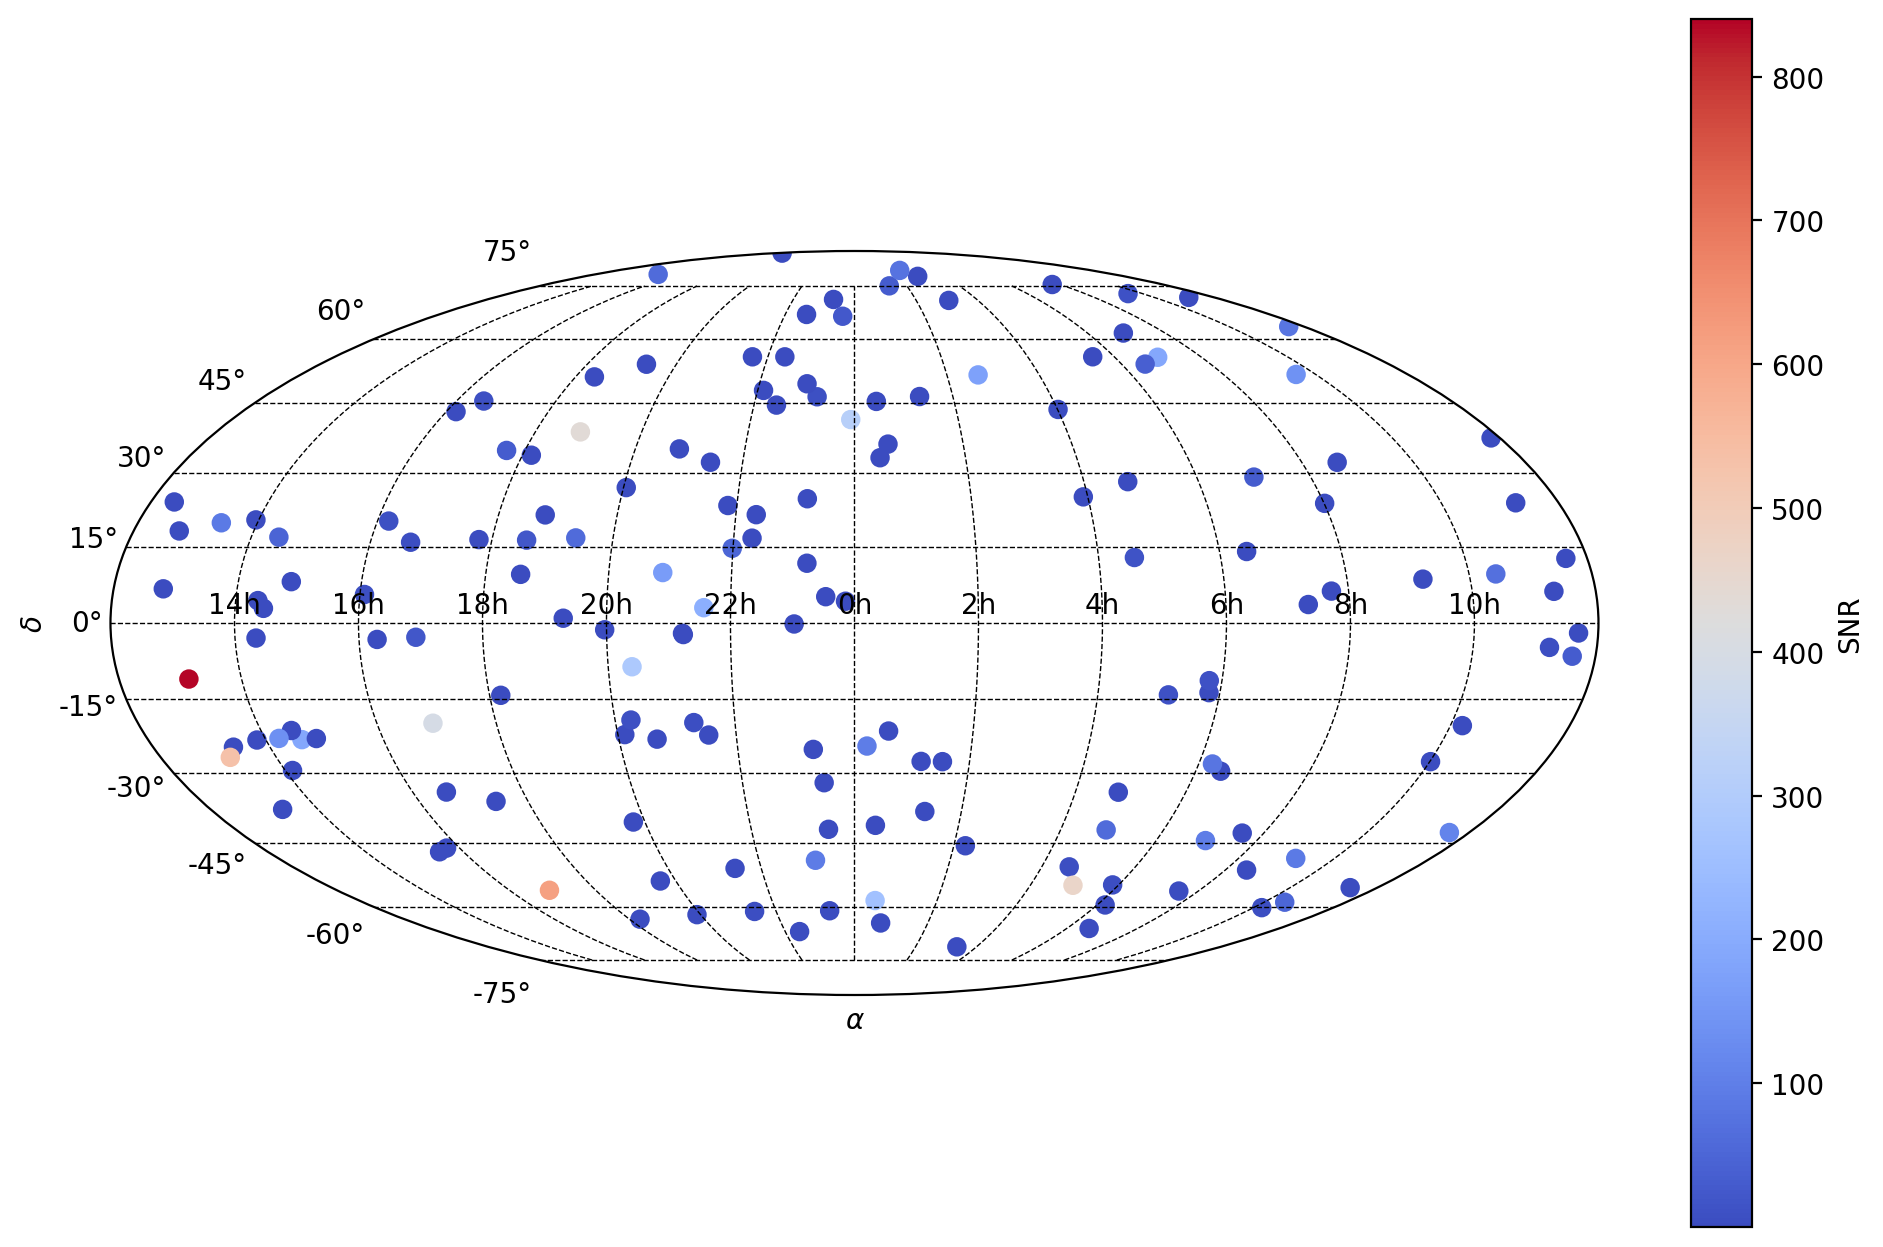

In [45]:
# source distribution
fig = plt.figure(figsize=(12,8), dpi=200)
ax = fig.add_subplot(111,projection='mollweide')
alpha = coord.Angle(ra*units.rad).wrap_at(180*units.degree).radian
h = ax.scatter(alpha,dec,c=snr,cmap='coolwarm')
xlab = ['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']
ax.set_xticklabels(xlab)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\delta$')
ax.grid(color='k',linestyle='--',linewidth=0.5)
plt.colorbar(h, label='SNR')
fig.savefig(estDir + 'fig/' + rlzFile + '/SourceDist.png',dpi=300, facecolor='white')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


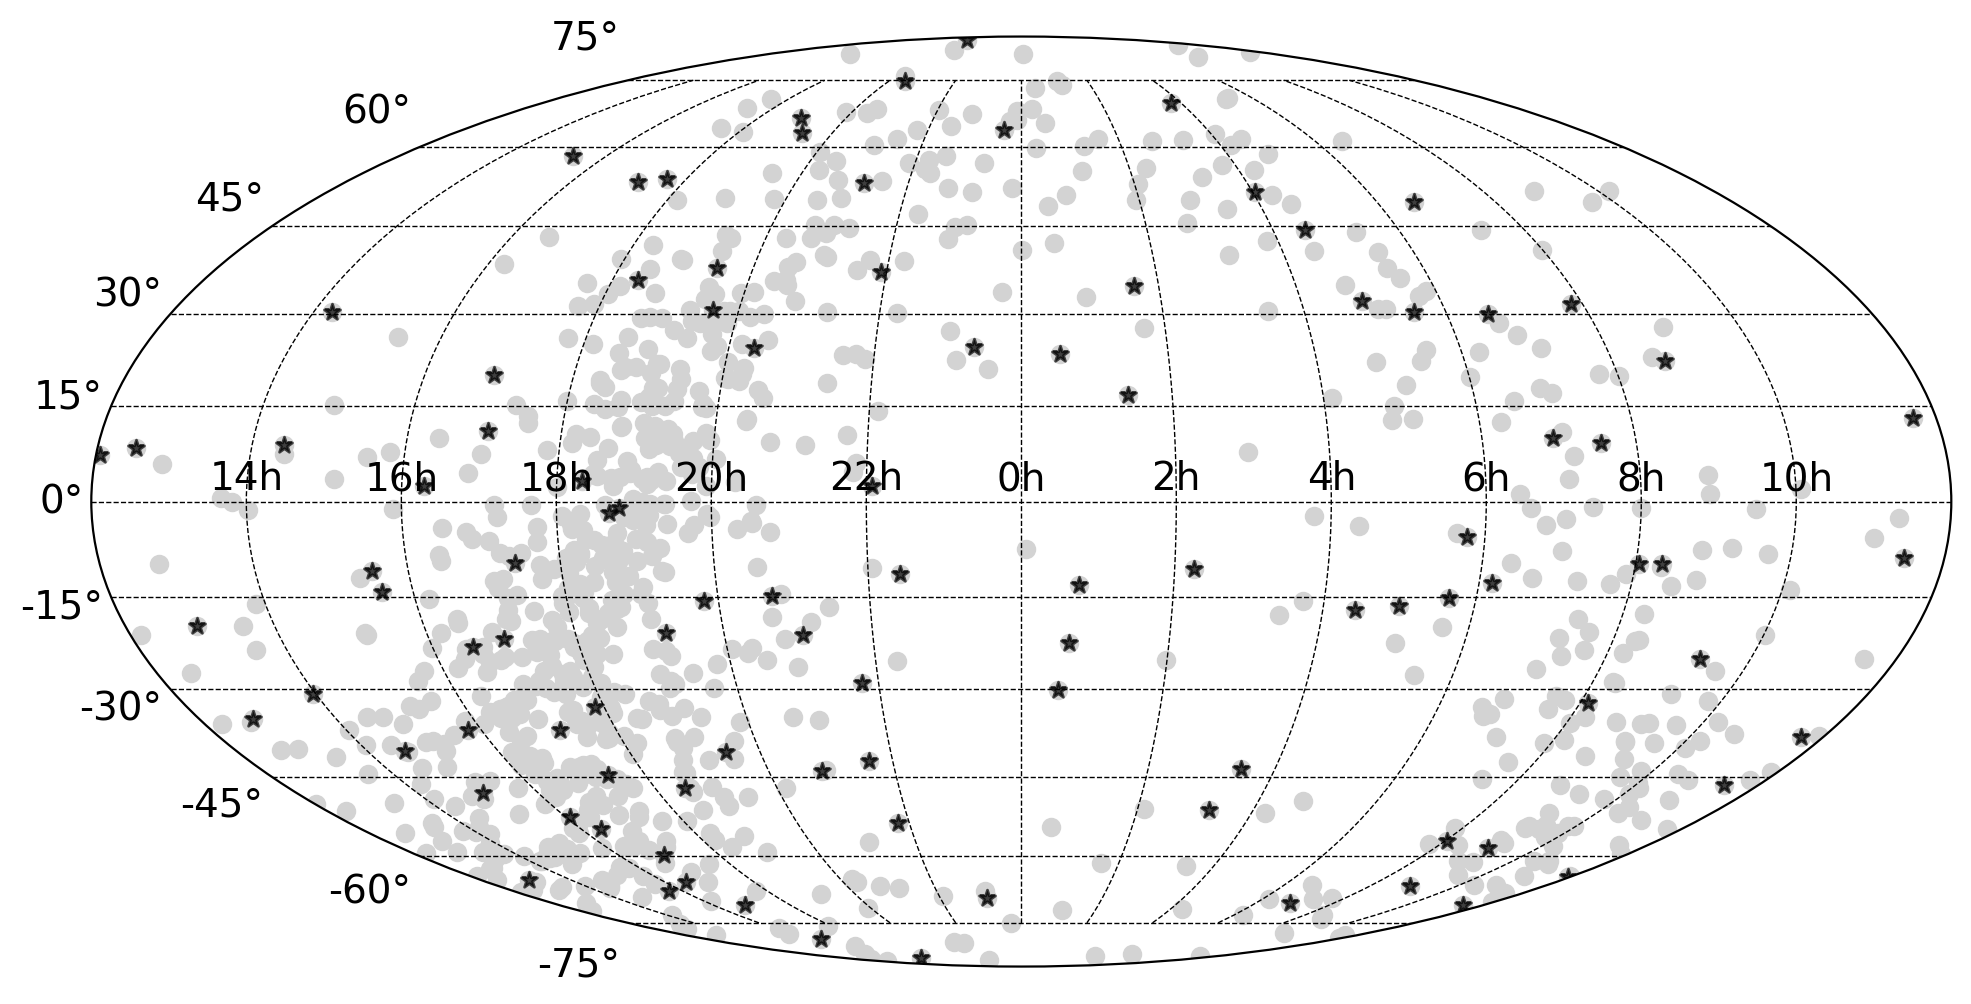

In [5]:
# MSPs distribution
# sns.set_palette('deep')
fig = plt.figure(figsize=(12,8), dpi=200)
ax = fig.add_subplot(111,projection='mollweide')
alpha = coord.Angle(alphaP*units.rad).wrap_at(180*units.degree).radian
h1 = ax.scatter(alpha[:100],deltaP[:100], label="Yuyang's", marker='*', zorder=2, alpha=0.7,facecolor='black')
h2 = ax.scatter(alpha, deltaP, label='ours', marker='o', zorder=1, facecolor='lightgray')
xlab = ['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']
ax.set_xticklabels(xlab)
ax.tick_params(axis='both', labelsize=14)
# ax.set_xlabel(r'$\alpha$')
# ax.set_ylabel(r'$\delta$', fontsize=14)
ax.grid(color='k',linestyle='--',linewidth=0.5)
# plt.legend()
fig.savefig('./MSPs.eps',dpi=300, facecolor='white',bbox_inches='tight')

# iMBLT results

In [47]:
snr_threshold = 20
repSrc = loadmat(estDir + rlzFile + '/repSrc_sky' + str(snr_threshold) + '.mat')
cfrSrc = loadmat(estDir + rlzFile + '/CnfrmSrc_sky' + str(snr_threshold) + '.mat')
matSrc = loadmat(estDir + rlzFile + '/matSrc_sky' + str(snr_threshold) + '.mat')
simSrc_nm = loadmat(estDir + rlzFile + '/simSrc_nm_sky' + str(snr_threshold) + '.mat')

In [48]:
repSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'repDec', 'repRA', 'repSNR'])

In [49]:
cfrSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'idDec', 'idRA', 'idSNR'])

In [50]:
matSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'matched_alpha_rep', 'matched_dec_rep', 'matched_snr_rep'])

In [51]:
simSrc_nm.keys()

dict_keys(['__header__', '__version__', '__globals__', 'simDec_nm', 'simRA_nm'])

In [52]:
repRA = repSrc['repRA']
repDec = repSrc['repDec']
repSNR = repSrc['repSNR']
cnfrmRA = cfrSrc['idRA']
cnfrmDec = cfrSrc['idDec']
cnfrmSNR = cfrSrc['idSNR']
matRA = matSrc['matched_alpha_rep']
matDec = matSrc['matched_dec_rep']
matSNR = matSrc['matched_snr_rep']
simRA_nm = simSrc_nm['simRA_nm']
simDec_nm = simSrc_nm['simDec_nm']

In [53]:
repRA.size

37

In [54]:
detection_rate = cnfrmDec.size / repDec.size
min_snr = min(repSNR[0])
with open(estDir + 'fig/' + 'detection_rate.txt','a') as f:
    f.write('Detection rate for ' + rlzFile + f' is: {detection_rate}, SNR threshold is {snr_threshold}, lowest reported SNR is {min_snr}')
    f.write('\n')

In [55]:
matRA[0]

array([3.44026839, 4.4314454 , 0.34457368, 3.4568108 , 1.30097597,
       6.26437647, 5.64639827, 3.4202777 , 4.93425184, 5.75614522,
       0.40033829, 0.10535531, 3.50706595, 3.82629313, 0.70055531,
       3.44026839, 4.23837315, 1.2787491 , 2.749179  , 4.43492721,
       5.33732878, 0.13080227, 5.46608036, 2.5063843 , 3.04024993,
       6.0694578 , 0.05590144, 0.59918838, 3.0341301 , 2.73191511,
       3.90713415, 1.83351022, 3.04288208, 5.07424512, 6.19532539,
       4.4296201 , 0.34777475])

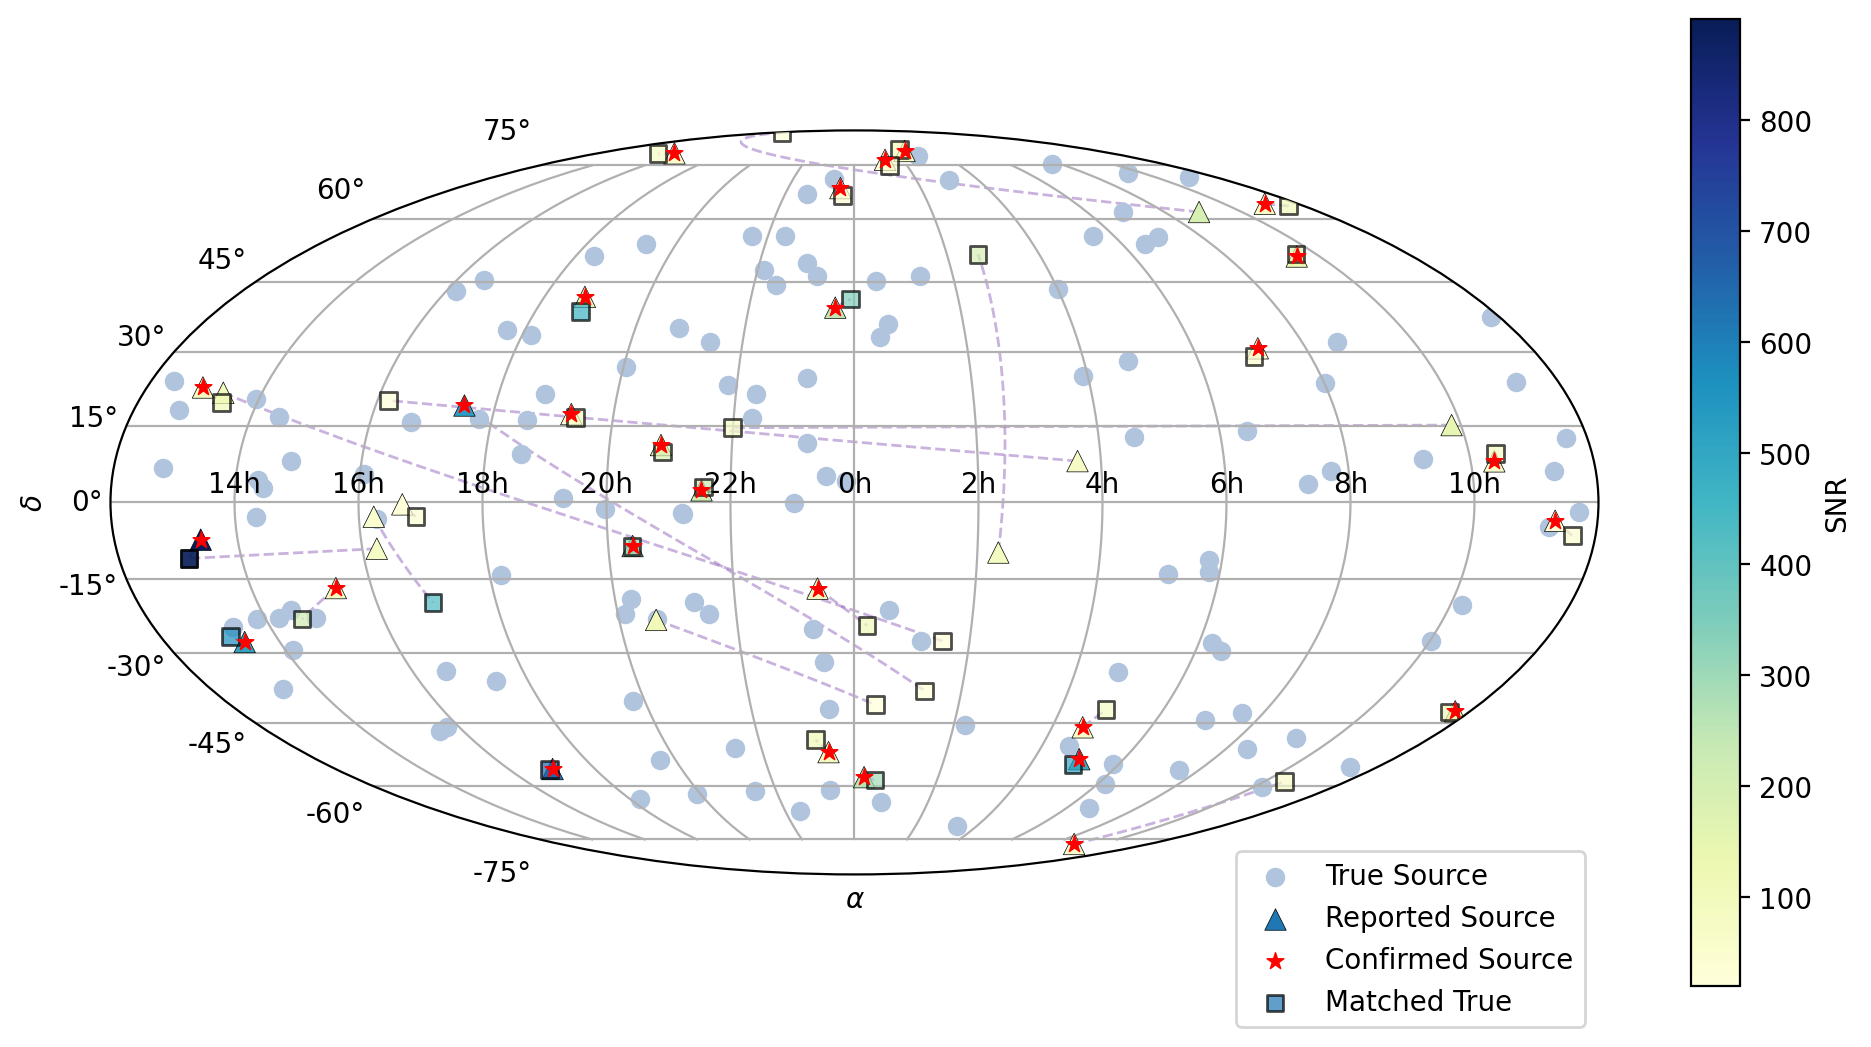

In [56]:
fig = plt.figure(figsize=(12,8),dpi=200)
ax = fig.add_subplot(111, projection='mollweide')

alpha_rep = coord.Angle(repRA * units.rad).wrap_at(180 * units.degree).radian
alpha_cnfrm = coord.Angle(cnfrmRA * units.rad).wrap_at(180 * units.degree).radian
alpha_mat = coord.Angle(matRA * units.rad).wrap_at(180 * units.degree).radian
alpha_sim_nm = coord.Angle(simRA_nm * units.rad).wrap_at(180 * units.degree).radian

f1 = ax.scatter(alpha_sim_nm,simDec_nm,label='True Source', zorder=1, color='lightsteelblue')
f2 = ax.scatter(alpha_rep,repDec,c=repSNR,cmap='YlGnBu',marker='^',s=60,edgecolor='k',lw=.25,label='Reported Source', zorder=2) # using up triangle for reported sources
f3 = ax.scatter(alpha_cnfrm,cnfrmDec,marker='*',s=40,edgecolor='r',facecolor='r',label='Confirmed Source', lw=0.5, zorder=4) # star for confirmed sources
f4 = ax.scatter(alpha_mat,matDec,c=matSNR,cmap='YlGnBu',marker='s',edgecolor='k', label='Matched True',alpha=0.7, zorder=3) # square for matched true sources

for i in range(len(repRA[0])):
    plt.plot([alpha_rep[0][i], alpha_mat[0][i]],[repDec[0][i], matDec[0][i]], ls='--', lw=1, color = 'C4', alpha=0.5,
    zorder=0)

ax.set_xticklabels(xlab)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\delta$')
ax.grid(True)
fig.colorbar(f2,shrink=0.8, label='SNR')
ax.legend(bbox_to_anchor=(1.0,.05))
fig.savefig(estDir + 'fig/' + rlzFile + '/MollWeide' + str(snr_threshold) + '.png',dpi=300,facecolor='white')

# Error Analysis

In [65]:
cnfrm_src = loadmat(estDir + rlzFile + '/Confirmed_Src_SNR' + str(snr_threshold) + '.mat')
matched_src = loadmat(estDir + rlzFile + '/Matched_Sources_SNR' + str(snr_threshold) + '.mat')

In [66]:
cnfrm_src.keys()

dict_keys(['__header__', '__version__', '__globals__', 'NcnfrmsrcBand', 'cnfrm_src_alpha', 'cnfrm_src_dec', 'cnfrm_src_freq', 'cnfrm_src_snr', 'confirm_src'])

In [67]:
cnfrm_src_alpha = cnfrm_src['cnfrm_src_alpha']
cnfrm_src_dec = cnfrm_src['cnfrm_src_dec']
cnfrm_src_snr = cnfrm_src['cnfrm_src_snr']
cnfrm_src_freq = cnfrm_src['cnfrm_src_freq']

In [68]:
cnfrm_src_freq.size

28

In [69]:
matched_src.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SrcAlpha', 'SrcDelta', 'id_max', 'id_max_cnfrm', 'matched_alpha', 'matched_alpha_rep', 'matched_dec', 'matched_dec_rep', 'matched_freq', 'matched_snr', 'matched_snr_rep'])

In [70]:
matched_alpha = matched_src['matched_alpha']
matched_dec = matched_src['matched_dec']
matched_snr = matched_src['matched_snr']
matched_freq = matched_src['matched_freq']

In [90]:
matched_snr[0]

array([8.40022919e+02, 6.14496667e+02, 5.32690230e+02, 4.64159506e+02,
       4.35641870e+02, 3.11997697e+02, 2.09678700e+02, 1.90211451e+02,
       8.86877225e+01, 6.04951561e+01, 5.16274803e+01, 1.24229926e-04,
       2.87110168e+02, 2.60921310e+02, 1.61667361e+02, 1.38316838e+02,
       1.10282175e+02, 9.60646652e+01, 9.25908583e+01, 8.08753024e+01,
       7.73152933e+01, 7.17050950e+01, 6.14836989e+01, 6.10610845e+01,
       3.12442599e+01, 3.03993980e+01, 3.01853427e+01, 2.39239264e+01])

In [89]:
cnfrm_src_snr[0]

array([891.10449401, 641.22907554, 508.32975013, 482.21517573,
       154.86991088, 247.3544809 , 209.93940696,  87.24768777,
        90.48599243,  63.21858453,  55.2054908 , 521.3830906 ,
       288.8005019 , 255.77256149, 156.33044639, 128.91597341,
       111.95968327,  92.28319342,  94.47897597,  74.81531381,
        77.02346845,  64.67076966,  26.06114903,  58.47605194,
        20.62113258,  28.77993411,  30.32777825,  22.4092955 ])

In [84]:
tmp = np.abs(cnfrm_src_snr - matched_snr)/matched_snr * 100
np.max(tmp)

419691923.6578835

In [86]:
tmp

array([[6.08097400e+00, 4.35029357e+00, 4.57310437e+00, 3.88997093e+00,
        6.44501777e+01, 2.07191325e+01, 1.24336556e-01, 5.41312116e+01,
        2.02764244e+00, 4.50189503e+00, 6.93043787e+00, 4.19691924e+08,
        5.88740452e-01, 1.97329562e+00, 3.30117039e+00, 6.79661614e+00,
        1.52110558e+00, 3.93638159e+00, 2.03920526e+00, 7.49300265e+00,
        3.77447804e-01, 9.81007747e+00, 5.76129129e+01, 4.23351898e+00,
        3.40002526e+01, 5.32728933e+00, 4.71870034e-01, 6.33102986e+00]])

In [91]:
freq_error = np.abs(matched_freq - cnfrm_src_freq)/matched_freq * 100
snr_error = np.abs(matched_snr - cnfrm_src_snr)/matched_snr * 100
ra_error = np.abs(matched_alpha - cnfrm_src_alpha)/matched_alpha * 100
dec_error = np.abs(matched_dec - cnfrm_src_dec)/np.abs(matched_dec) * 100

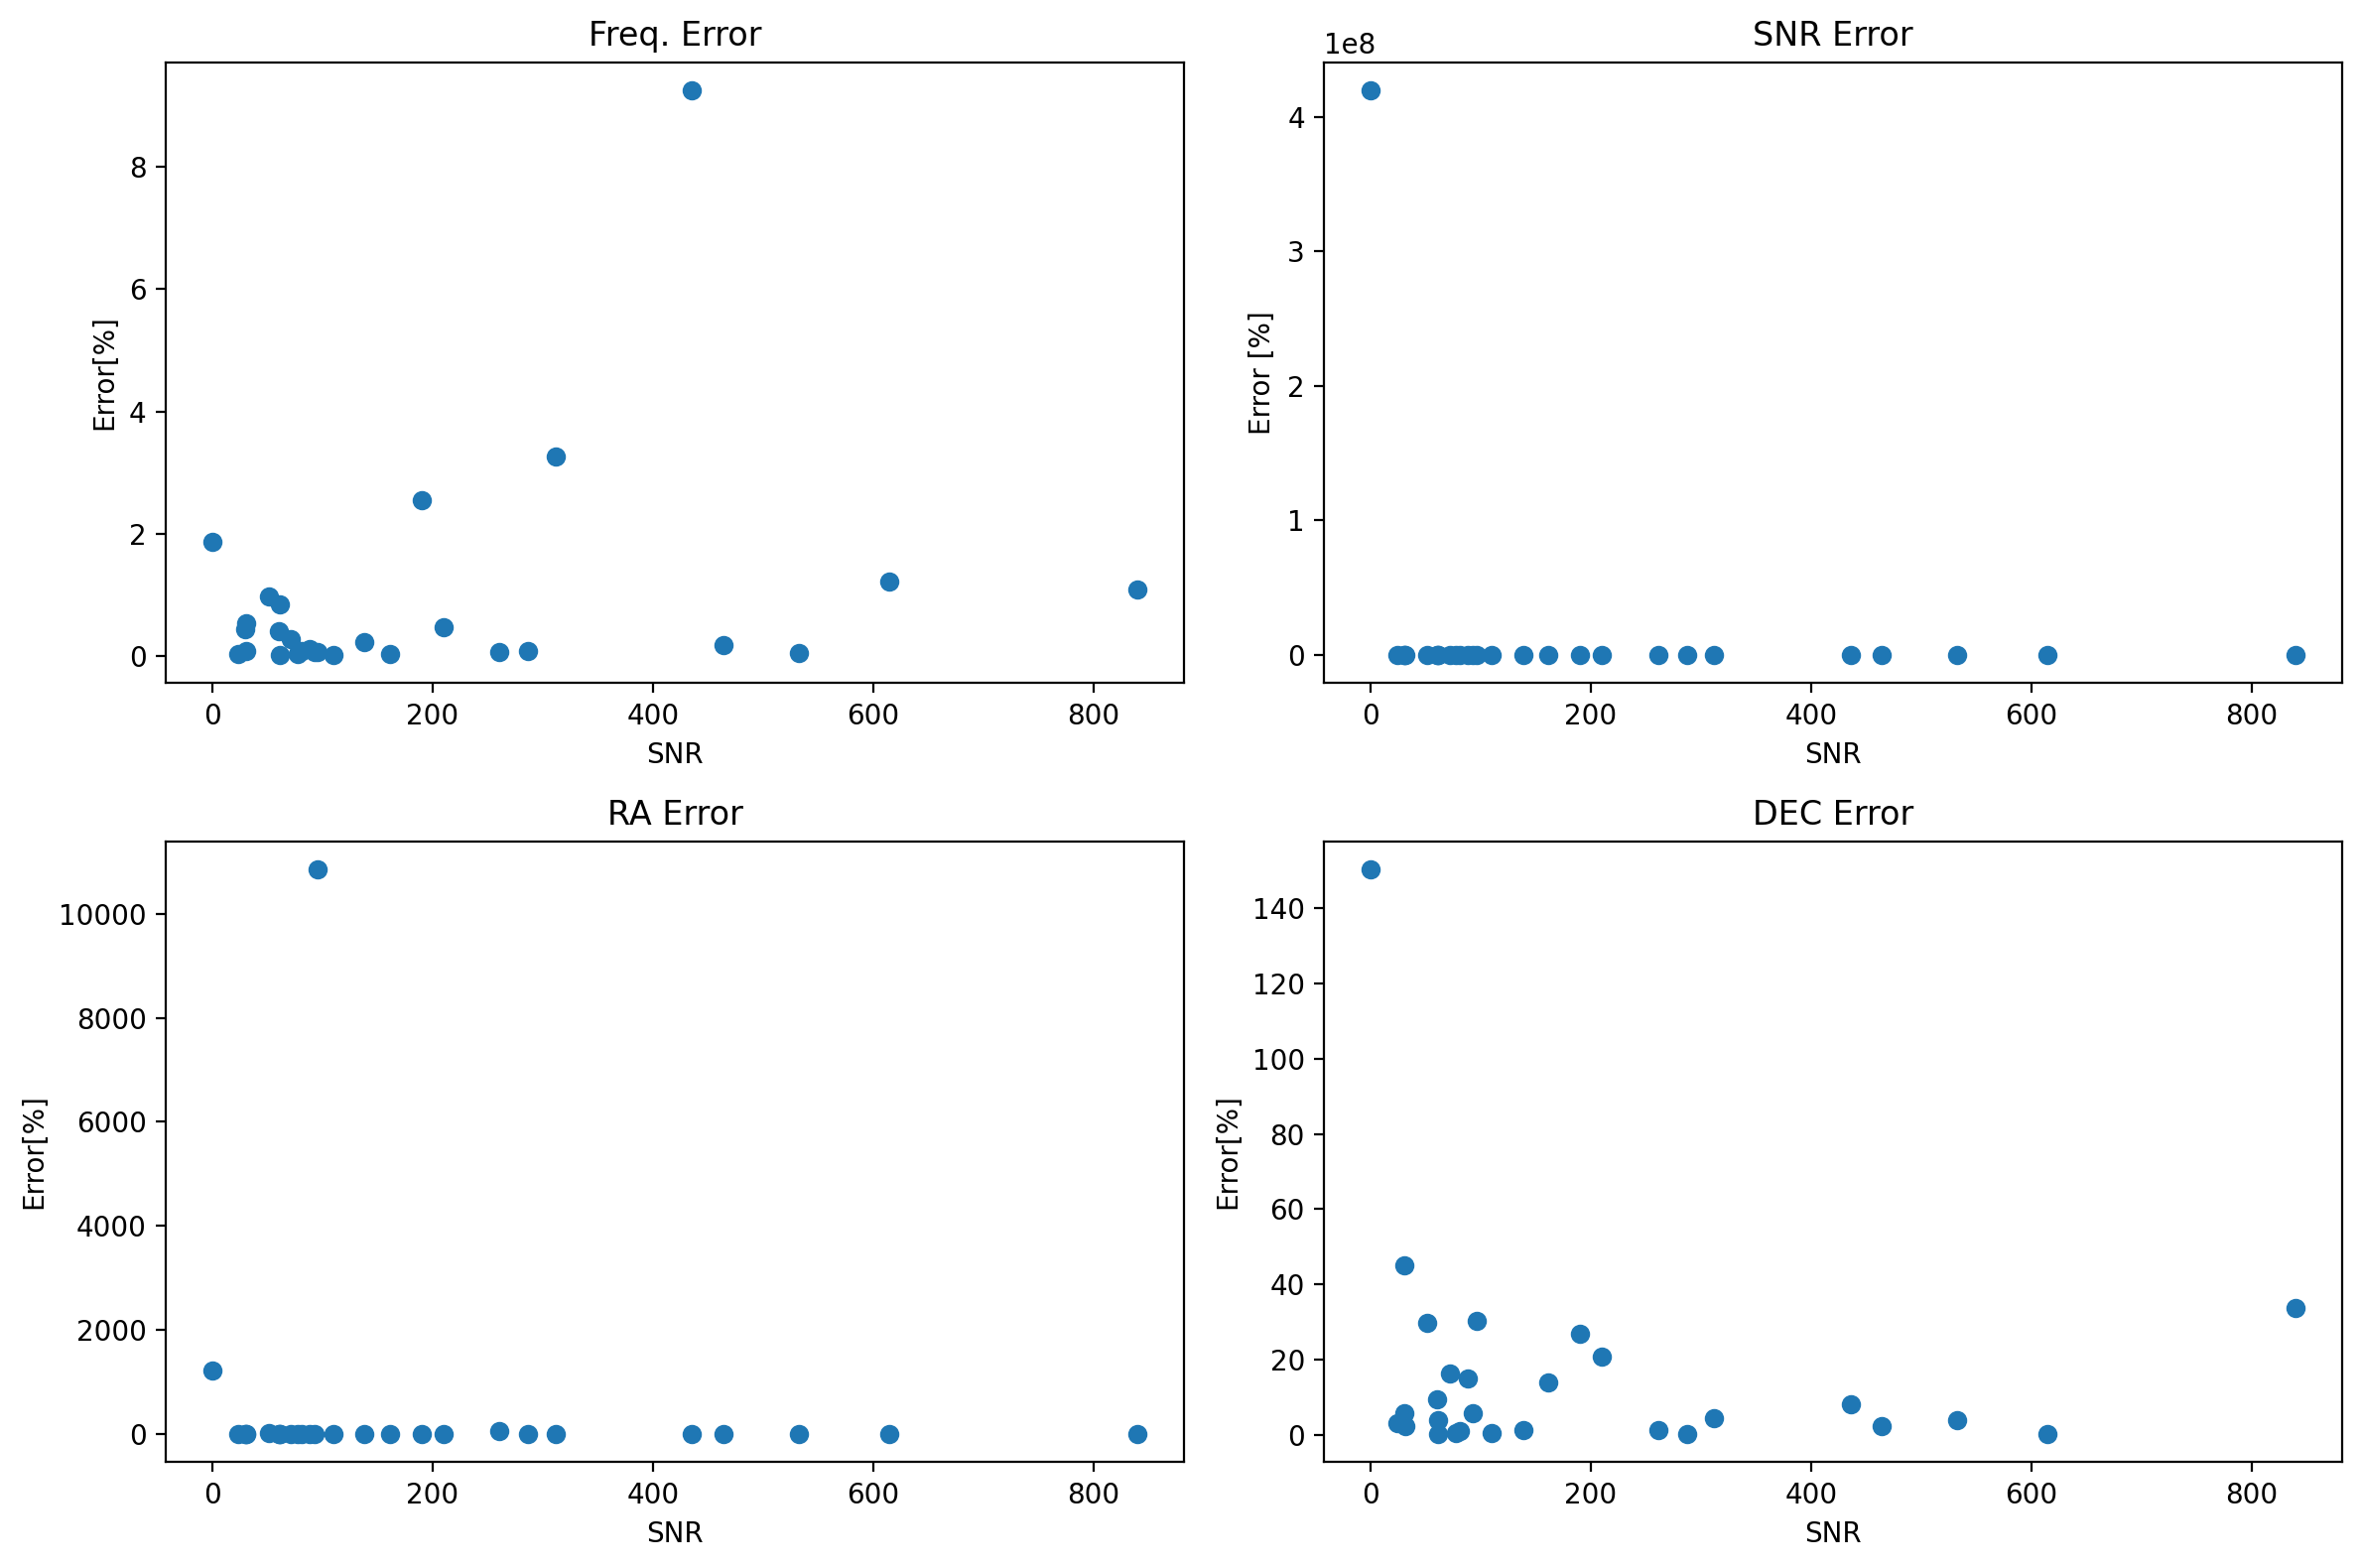

In [92]:
fig = plt.figure(figsize=(12,8),dpi=200)
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(matched_snr,freq_error)
ax1.set_title('Freq. Error')
ax1.set_xlabel('SNR')
ax1.set_ylabel('Error[%]')

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(matched_snr, snr_error)
ax2.set_title('SNR Error')
ax2.set_xlabel('SNR')
ax2.set_ylabel('Error [%]')

ax1 = fig.add_subplot(2,2,3)
ax1.scatter(matched_snr, ra_error)
ax1.set_title('RA Error')
ax1.set_xlabel('SNR')
ax1.set_ylabel('Error[%]')

ax1 = fig.add_subplot(2,2,4)
ax1.scatter(matched_snr, dec_error)
ax1.set_title('DEC Error')
ax1.set_xlabel('SNR')
ax1.set_ylabel('Error[%]')
plt.tight_layout()
fig.savefig(estDir + 'fig/' + rlzFile + '/Error' + str(snr_threshold) + '.png',dpi=300,facecolor='white')